# Process Overview

**In order to determine the distribution of Excess Readmission Ratios (ERR) for readmission categories of interest 
across key hospital caregories, the following general process will be conducted:**
    
**1. Merge contributory datasets into a master dataset that can be analyzed**

**2. Explore potential hospital categories to analyze**

**3. Clean master dataset so that it may be appropriately analyzed**

**4. Divide master dataset into 6 sub-datasets, corresponding to the 6 readmission categories**

**5. Develop a series of functions which will produce the tables, visualization, and statistics necessary for analysis when applied to each of these 6 datasets**

**6. Apply these functions and summarize results**

## 1. Merge contributory datasets into a master dataset that can be analyzed

**load necessary packages**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats as stats

**read in both the General, and Readmissions hospital datasets**

In [2]:
general = pd.read_csv("Hospital_General_Information.csv")
readmission = pd.read_csv("Hospital_Readmissions_Reduction_Program.csv")

**ensure that all of the columns will be visible for inspection**

In [3]:
pd.set_option('display.max_columns', 50)

**view a sample of both datasets**

In [4]:
general.sample(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
1288,110089,COFFEE REGIONAL MEDICAL CENTER,1101 OCILLA ROAD,DOUGLAS,GA,31533,COFFEE,9123835620,Acute Care Hospitals,Government - Hospital District or Authority,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"1101 OCILLA ROAD DOUGLAS, GA 31533 (31.509589,..."
1403,140280,TRINITY ROCK ISLAND,2701 17TH ST,ROCK ISLAND,IL,61201,ROCK ISLAND,3097795000,Acute Care Hospitals,Voluntary non-profit - Other,True,True,3,NaN,Below the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,"2701 17TH ST ROCK ISLAND, IL 61201 (41.483649,..."
471,10110,BULLOCK COUNTY HOSPITAL,102 WEST CONECUH AVENUE,UNION SPRINGS,AL,36089,BULLOCK,3347382140,Acute Care Hospitals,Proprietary,True,True,Not Available,There are too few measures or measure groups r...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,There are too few measures or measure groups r...,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"102 WEST CONECUH AVENUE UNION SPRINGS, AL 3608..."


In [5]:
readmission.sample(3)

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
7195,SAINT FRANCIS HOSPITAL MUSKOGEE,370025,OK,READM_30_CABG_HRRP,Not Available,5 - Results are not available for this reporti...,Not Available,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
9680,COOK MEDICAL CENTER A CAMPUS OF TIFT REG MED...,110101,GA,READM_30_AMI_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
485,PALMETTO HEALTH BAPTIST PARKRIDGE,420106,SC,READM_30_PN_HRRP,248,NaN,0.9608,14.6512,15.2484,34,07/01/2014,06/30/2017


**It appears that the readmissions dataset contains the outcome metric, Excess Readmission Ratio (ERR) values and names.  The general dataset has additional information related to hospital categories. Both sets will have to be merged in order to answer the research question.**

**view the dimensions**

In [6]:
general.shape

(4784, 29)

In [7]:
readmission.shape

(19674, 12)

**confirm assumption that provider ID is a unique value in the general dataset (1:1 ratio) and therefore will be used as the key to merge both datasets**

In [8]:
len(general["Provider ID"].unique())

4784

**It would appear that there is redundancy in hospital name, further indicating that provider ID**
**is a more appropriate field to merge the datasets upon**

In [9]:
len(general["Hospital Name"].unique())

4600

**Merging the 2 hospital datasets together according to "Provider ID"**

In [10]:
hosp_tot = pd.merge(general, readmission, on= "Provider ID")

**Inspecting shape of merged data.**


**Since the number of rows in the new hosp_tot dataset match the number of rows in the readmissions dataset, it would appear that the readmissions records are now accompanied by the information in the general dataset, as desired**

In [11]:
hosp_tot.shape

(19674, 40)

**view of sample from full dataset**

In [12]:
hosp_tot.sample(5)

,Provider ID,Hospital Name_x,Address,City,State_x,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location,Hospital Name_y,State_y,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
18767,670110,FIRST TEXAS HOSPITAL CARROLLTON LLC,1401 E TRINITY MILLS ROAD,CARROLLTON,TX,75006,DALLAS,9728100700,Acute Care Hospitals,Proprietary,True,NaN,Not Available,There are too few measures or measure groups r...,Not Available,There are too few measures or measure groups r...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,There are too few measures or measure groups r...,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,"1401 E TRINITY MILLS ROAD CARROLLTON, TX 75006...",FIRST TEXAS HOSPITAL CARROLLTON LLC,TX,READM_30_PN_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
2785,40015,MENA REGIONAL HEALTH SYSTEM,311 NORTH MORROW STREET,MENA,AR,71953,POLK,4793946100,Acute Care Hospitals,Government - Local,True,True,2,NaN,Below the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Not Available,There are too few measures or measure groups r...,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"311 NORTH MORROW STREET MENA, AR 71953 (34.588...",MENA REGIONAL HEALTH SYSTEM,AR,READM_30_CABG_HRRP,Not Available,5 - Results are not available for this reporti...,Not Available,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
11028,300020,SOUTHERN NH MEDICAL CENTER,8 PROSPECT STREET,NASHUA,NH,3060,HILLSBOROUGH,6035772000,Acute Care Hospitals,Voluntary non-profit - Private,True,True,3,NaN,Above the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"8 PROSPECT STREET NASHUA, NH 03060 (42.756061,...",SOUTHERN NH MEDICAL CENTER,NH,READM_30_AMI_HRRP,159,NaN,1.0172,15.6932,15.4284,26,07/01/2014,06/30/2017
14819,390090,WEST PENN HOSPITAL,4800 FRIENDSHIP AVENUE,PITTSBURGH,PA,15224,ALLEGHENY,4125785000,Acute Care Hospitals,Voluntary non-profit - Private,True,True,3,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"4800 FRIENDSHIP AVENUE PITTSBURGH, PA 15224 (4...",WEST PENN HOSPITAL,PA,READM_30_PN_HRRP,70,NaN,1.0075,17.9135,17.7800,13,07/01/2014,06/30/2017
14186,340129,LAKE NORMAN REGIONAL MEDICAL CENTER,171 FAIRVIEW ROAD,MOORESVILLE,NC,28117,IREDELL,7046604000,Acute Care Hospitals,Proprietary,True,True,2,NaN,Same as the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,S

**Dropping duplicate state column, renaming the State and Hospital Name columns**

In [13]:
hosp_tot.drop(columns = ["State_x"], inplace=True)
hosp_tot.rename(columns={"State_y": "State"}, inplace=True)
hosp_tot.drop(columns = ["Hospital Name_x"], inplace=True)
hosp_tot.rename(columns={"Hospital Name_y": "Hospital Name"}, inplace=True)

#inplace mutates the original dataframe

hosp_tot.sample(5)

,Provider ID,Address,City,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location,Hospital Name,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
15008,360163,2139 AUBURN AVENUE,CINCINNATI,45219,HAMILTON,5135852000,Acute Care Hospitals,Voluntary non-profit - Private,True,True,5,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,"2139 AUBURN AVENUE CINCINNATI, OH 45219 (39.12...",CHRIST HOSPITAL,OH,READM_30_COPD_HRRP,381,NaN,1.0209,21.1038,20.6717,82,07/01/2014,06/30/2017
4523,50523,3901 LONE TREE WAY,ANTIOCH,94509,CONTRA COSTA,9257797200,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,"3901 LONE TREE WAY ANTIOCH, CA 94509 (37.98229...",SUTTER DELTA MEDICAL CENTER,CA,READM_30_PN_HRRP,356,NaN,1.0085,16.9912,16.8472,61,07/01/2014,06/30/2017
2812,40067,101 HOSPITAL DRIVE,MAGNOLIA,71754,COLUMBIA,8702353000,Acute Care Hospitals,Government - Local,True,True,2,NaN,Below the national average,NaN,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"101 HOSPITAL DRIVE MAGNOLIA, AR 71754 (33.2751...",MAGNOLIA HOSPITAL,AR,READM_30_HIP_KNEE_HRRP,Not Available,5 - Results are not available for this reporti...,Not Available,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
12868,440109,935 WAYNE ROAD,SAVANNAH,38372,HARDIN,7319268121,Acute Care Hospitals,Government - Local,True,True,3,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,"935 WAYNE ROAD SAVANNAH, TN 38372 (35.22713, -...",HARDIN MEDICAL CENTER,TN,READM_30_HIP_KNEE_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
820,390163,ONE NOLTE DRIVE,KITTANNING,16201,ARMSTRONG,7245438500,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"ONE NOLTE DRIVE KITTANNING, PA 16201",ACMH HOSPITAL,PA,READM_30_HIP_KNEE_HRRP,Not Available,5 - Results are not available for this reporti...,0.916,3.7366,4.0791,Not Available,07/01/2014,06/30/2017


**With a master dataset compiled, it appears that we are now ready to begin assessing which hospital categories to analyze**

## 2. Explore potential hospital categories to analyze 

**It would appear that only Acute Care Hospitals are included in our merged dataset.  
It is likely that the 6 procedures that are being assessed would not occur in either a Critical Access or Childrens Hospitals.**

**Since there is only 1 remaining category, Hospital Type would not be useful for our analysis**

In [14]:
hosp_tot["Hospital Type"].value_counts()

Acute Care Hospitals    19674
Name: Hospital Type, dtype: int64

In [15]:
general["Hospital Type"].value_counts()

Acute Care Hospitals         3338
Critical Access Hospitals    1348
Childrens                      98
Name: Hospital Type, dtype: int64

**Hospital Overall Rating seems like an appropriate component to compare against the Excess Readmission Ratio**

In [16]:
hosp_tot["Hospital overall rating"].value_counts()

3                5910
4                4542
2                4344
1                1662
Not Available    1614
5                1602
Name: Hospital overall rating, dtype: int64

**While removing the "Not Available" rows was considered, it was decided against both because this would decrease the size of the dataset, and because there may be an underlying reason that these hospitals are not rated. If this category is consistently higher or lower than the other categories, this might imply that unrated hospitals tend to be of higher or lower relative quality on average.**

In [17]:
#hosp_tot = hosp_tot.loc[hosp_tot["Hospital overall rating"]!="Not Available"]

**Hospital Ownership seems like prudent choice for analysis, and demonstrates a decent distribution of values**

In [18]:
hosp_tot["Hospital Ownership"].value_counts()

Voluntary non-profit - Private                 8472
Proprietary                                    4188
Voluntary non-profit - Other                   1962
Government - Hospital District or Authority    1578
Voluntary non-profit - Church                  1554
Government - Local                              990
Physician                                       426
Government - State                              270
Government - Federal                            204
Tribal                                           30
Name: Hospital Ownership, dtype: int64

**In a similar fashion, State seems like a viable candidate for further analysis**

In [19]:
hosp_tot["State"].value_counts()

TX    1836
CA    1764
FL    1008
NY     906
PA     906
OH     768
IL     756
GA     600
MI     564
TN     534
LA     534
OK     510
IN     510
AL     504
NC     504
VA     444
MO     432
WI     396
NJ     384
KY     384
MS     378
AZ     366
MA     330
SC     324
KS     306
CO     300
MN     294
WA     294
MD     282
AR     270
IA     204
OR     204
NM     186
UT     186
CT     180
WV     174
NE     138
NV     132
SD     114
ME     102
ID      90
MT      84
NH      78
WY      72
HI      72
RI      60
AK      48
ND      48
DC      42
VT      36
DE      36
Name: State, dtype: int64

# 3. Clean master dataset for appropriate analysis

**Inspecting the different datatypes of the different columns**

**The ERR is an object. This will have to be changed into a float data type in order to conduct future computations**

In [20]:
hosp_tot.dtypes

Provider ID                                                       int64
Address                                                          object
City                                                             object
ZIP Code                                                          int64
County Name                                                      object
Phone Number                                                      int64
Hospital Type                                                    object
Hospital Ownership                                               object
Emergency Services                                                 bool
Meets criteria for meaningful use of EHRs                        object
Hospital overall rating                                          object
Hospital overall rating footnote                                 object
Mortality national comparison                                    object
Mortality national comparison footnote                          

**Inspecting the values of ERR**

**There are a fair number of "Not Available" values** 

**Without a clear methodology 
for how to substitute other values in place of unavailable values, all records with these empty values will be removed**

In [21]:
hosp_tot["Excess Readmission Ratio"].value_counts()

Not Available    5394
0.9765             17
1.0048             16
1.0002             15
1.0022             15
0.9935             15
0.9503             15
0.9799             15
0.9823             15
1.0129             14
1.0046             14
0.9591             14
0.9613             14
0.9654             14
0.9675             14
0.9856             14
0.9786             14
1.0071             14
0.9802             14
0.9811             14
1.0248             13
0.9885             13
1.0089             13
0.9955             13
0.9914             13
0.9721             13
1.0068             13
1.022              13
0.9794             13
0.9696             13
                 ... 
0.745               1
0.8838              1
1.169               1
1.118               1
0.747               1
1.2065              1
1.1549              1
1.1066              1
0.8105              1
1.1593              1
1.2248              1
1.2845              1
0.878               1
0.9155              1
1.288     

**Removing rows with a "Not Available" value from ERR**

In [22]:
hosp_tot = hosp_tot.loc[hosp_tot["Excess Readmission Ratio"]!="Not Available"]

**Inspecting shape of remaining dataset**

In [23]:
hosp_tot.shape

(14280, 38)

**It was earlier noticed that the "ERR" value was an object** 

**Below we change this field to a float so that it may be used for computations purposes**

In [24]:
hosp_tot["Excess Readmission Ratio"] = hosp_tot["Excess Readmission Ratio"].astype(float)
hosp_tot["Excess Readmission Ratio"].dtype

dtype('float64')

**Inspect the values for the different "Measure Names"**

**It appears that the values are organized into the 6 Readmission Measures desired desired for our analysis**

In [25]:
hosp_tot["Measure Name"].value_counts()

READM_30_PN_HRRP          2948
READM_30_HF_HRRP          2882
READM_30_COPD_HRRP        2869
READM_30_HIP_KNEE_HRRP    2485
READM_30_AMI_HRRP         2087
READM_30_CABG_HRRP        1009
Name: Measure Name, dtype: int64

# 4. Divide master dataset into 6 sub-datasets, corresponding to the 6 readmission categories

**As the main dataset has been appropriately cleaned for our purposes, sub-datasets are now created for each of the
6 readmission categories.**

**Identical analyses will be conducted with each of these datasets.**

Acute Myocardial Infarction Dataset

In [26]:
ami = hosp_tot.loc[hosp_tot["Measure Name"]=="READM_30_AMI_HRRP"]

Pneumonia Dataset

In [27]:
pn = hosp_tot.loc[hosp_tot["Measure Name"]=="READM_30_PN_HRRP"]

Hip and Knee Surgery Dataset

In [28]:
hipknee = hosp_tot.loc[hosp_tot["Measure Name"]=="READM_30_HIP_KNEE_HRRP"]

Chronic Obstructive Pulmonary Disease Dataset

In [29]:
copd = hosp_tot.loc[hosp_tot["Measure Name"]=="READM_30_COPD_HRRP"]

Coronary Artery Bypass Graft dataset

In [30]:
cabg = hosp_tot.loc[hosp_tot["Measure Name"]=="READM_30_CABG_HRRP"]

Heart Failure Dataset

In [31]:
hf = hosp_tot.loc[hosp_tot["Measure Name"]=="READM_30_HF_HRRP"]

# 5. Develop a series of functions which will produce the necessary analysis and visualization  when applied to each of the 6 datasets

**There will be a fair amount of repetition in the visualization portion, and so functions will be used to automate the creation of tables/visualizations/supporting statistics.**

**For each of the Readmission-Measure-Category (AMI, FH, etc.) and Hospital-Type-Category (Ownership, Overall Rating, State) pairings, the following aggregations/visualizations will be provided:** 

**1. Mean/Standard Deviation dataframe for ERR across category pairings**

**2. Bar Charts for the mean ERR across the different category pairings**

**3. Box Plots demonstrating the distribution of ERR across different category pairings**

**4. An ANOVA analysis will be presented at the end, demonstrating if there were statistically significant variation in the ERR for across different hospital categories, and across all 6 Readmission Measure Categories**

.

**Mean/Standard Deviation tables**

**These will display the average values and standard deviations of ERR across hospital categories**

In [32]:
def mean_std(df,col):
    
    '''This function takes a dataframe and column name, groups by the column name
       and then returns both a mean and a standard deviation value for the groups.
       
       Arguments 
       ---------
       df: dataframe
       col: column name as string
       
       Return
       ------
       Returns a dataframe containing mean and standard deviation of the groups'''
    
    return df.groupby(col).agg(["mean","std"])[["Excess Readmission Ratio"]].\
    sort_values(("Excess Readmission Ratio","mean"), ascending = False )

**Bar Chart Tables**

**These will enable us to visualize the different average ERR across hospital categories**

In [33]:
def barchar(df,col,metric_name):
    
    '''This function takes a dataframe, column name, 
    and the name of the outcome metric, and outputs
    a graphical representation of the average ERR
    values across the different values in the column.

    Arguments 
    ---------
    df: dataframe
    col: column name as a string
    metric_name: metric name as a string

    Return
    ------
    None'''
    
    plt.figure(figsize=(9, 3))
    df.groupby(col)["Excess Readmission Ratio"].mean().sort_values(ascending=False).plot.bar()
    plt.xlabel(col)
    plt.ylabel('Mean of ' +metric_name + ' \nExcess Readmission Ratio')
    plt.title('Mean of ' +metric_name + ' \nExcess Readmission Ratios Across ' + col, fontsize=20)

**Box Plots**

**These will enable us to visualize the variation in ERR across hospital categories**

In [34]:
def boxp(df, col, metric_name):
    
    '''This function takes a dataframe, column name,
    and the name of the outcome metric, and outputs 
    a graphical representation of the distribution of
    the metric across the different values in the column.
    
    Arguments
    ---------
    df: dataframe
    col: column name as a string
    metric_name: metric name as a string
    
    Return
    ------
    None'''
    
    idx = df.groupby(col).median()[["Excess Readmission Ratio"]].\
    sort_values("Excess Readmission Ratio", ascending=False).index
    
    sns.set(rc={'figure.figsize':(20,10), "xtick.labelsize": 8})
    sns.boxplot(x=col, y='Excess Readmission Ratio', data=df, order=idx).set_title('Distribution of Excess '+ metric_name+ ' \nReadmission Ratios by ' +col)



**ANOVA**

**This function will allow us to display various ANOVA tests for our final analysis**

In [1]:
def anov(df, col):
    
    '''This function takes in a dataframe, and a column,
    and subsets the values of ERR for each unique category of the column
    and outputs an ANOVA analysis for each unique category
    
    Arguments
    ---------
    df: dataframe
    col: column name as a string
    
    Return
    ------
    An ANOVA analysis across the different values of ERR within the selected category'''

    catlist = df[col].unique().tolist()
    lis = []
    for cat in catlist:
        lis.append(df["Excess Readmission Ratio"].loc[df[col]==cat])
    
    return stats.f_oneway(*lis)

**The below make two lists of 6 different Readmission-specific datasets, and the full names of readmissions types that they represent, which will be used for displaying final ANOVA analyses**

In [36]:
measure_dfs = [ami, pn, hipknee, copd, cabg, hf]
measure_names = ["Acute Myocardial Infarction", "Pneumonia", "Hip and Knee Surgery", 
                 "Chronic Obstructive Pulmonary Disease", "Coronary Artery Bypass Graft", 
                 "Heart Failure"]

# 6. Apply these functions and interpret results

**Breakdown of Excess Acute Myocardial Infarction Readmission Across Hospital Ownership**

In [37]:
mean_std(ami,"Hospital Ownership")

Excess Readmission Ratio          
                                                                mean       std
Hospital Ownership                                                            
Proprietary                                                 1.022450  0.063590
Government - Federal                                        1.019586  0.083706
Government - State                                          1.010829  0.065066
Government - Local                                          1.001708  0.053034
Voluntary non-profit - Private                              0.998143  0.064486
Voluntary non-profit - Other                                0.994578  0.055729
Government - Hospital District or Authority                 0.993812  0.051683
Voluntary non-profit - Church                               0.992941  0.065735
Physician                                                   0.973355  0.074895

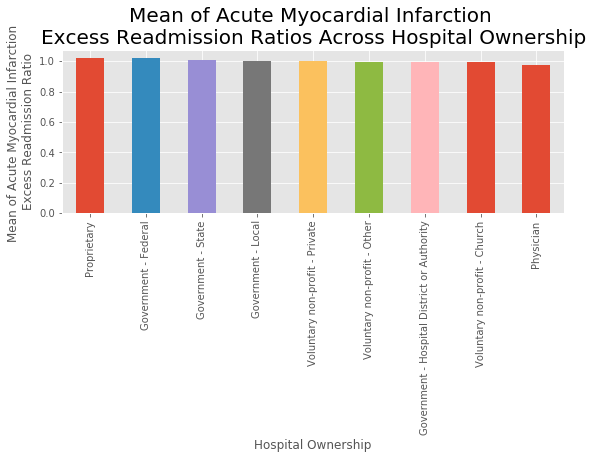

In [38]:
barchar(ami, "Hospital Ownership", "Acute Myocardial Infarction")

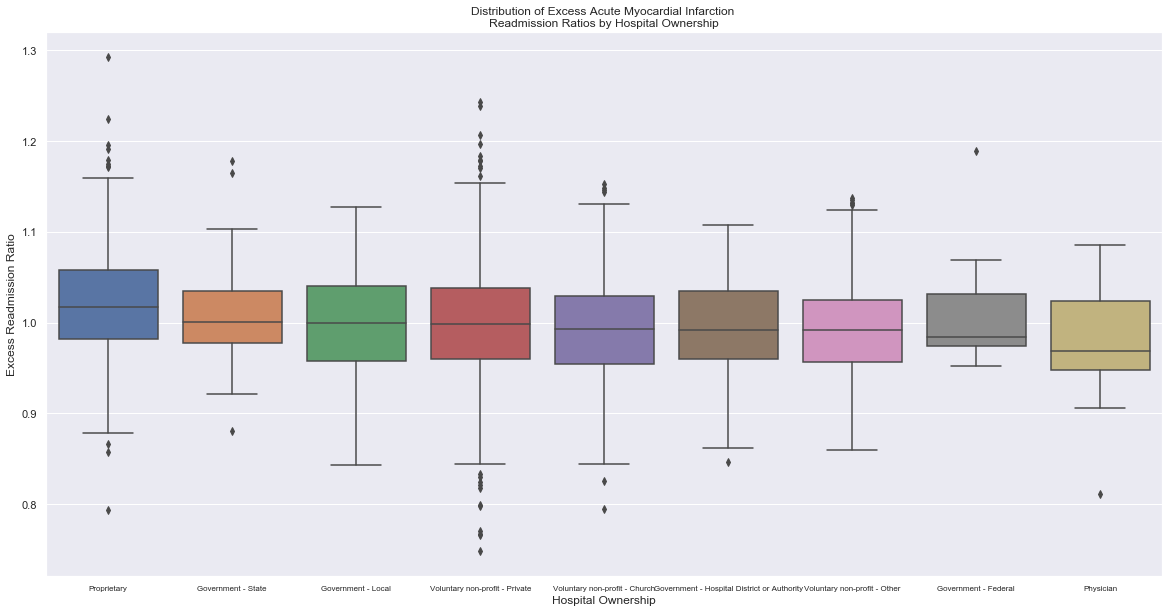

In [39]:
boxp(ami, "Hospital Ownership", "Acute Myocardial Infarction")

**Breakdown of Excessive Pneumonia Readmission across Hospital Ownership**

In [40]:
mean_std(pn,"Hospital Ownership")

Excess Readmission Ratio          
                                                                mean       std
Hospital Ownership                                                            
Proprietary                                                 1.014783  0.078885
Government - State                                          1.002977  0.078873
Government - Local                                          1.002888  0.078673
Voluntary non-profit - Private                              1.001714  0.080452
Voluntary non-profit - Other                                0.996777  0.074003
Government - Hospital District or Authority                 0.995213  0.073430
Government - Federal                                        0.994559  0.092559
Voluntary non-profit - Church                               0.990439  0.091287
Physician                                                   0.963836  0.062477
Tribal                                                      0.934800  0.066425

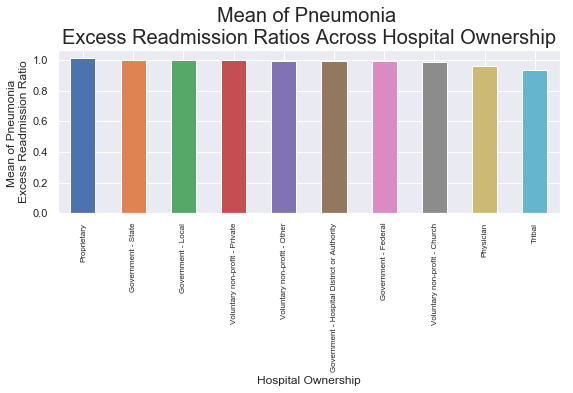

In [41]:
barchar(pn, "Hospital Ownership", "Pneumonia")

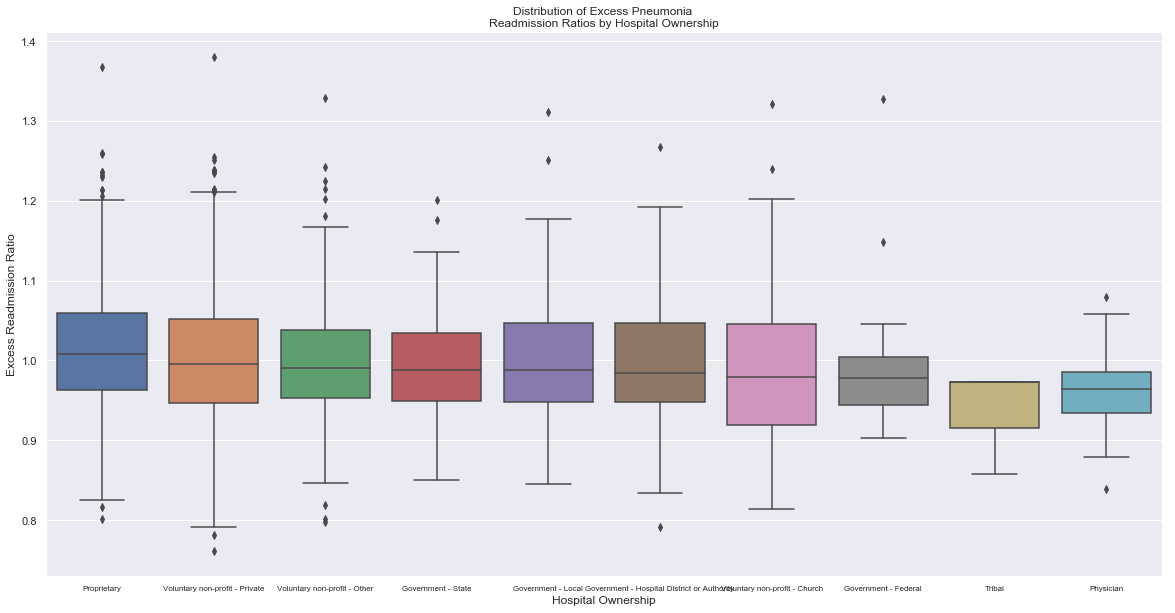

In [42]:
boxp(pn, "Hospital Ownership", "Pneumonia")

**Breakdown of Excess Hip and Knee Surgery Readmission Across Hospital Ownership**

In [43]:
mean_std(hipknee,"Hospital Ownership")

Excess Readmission Ratio          
                                                                mean       std
Hospital Ownership                                                            
Proprietary                                                 1.035948  0.137671
Government - State                                          1.033493  0.112523
Government - Hospital District or Authority                 1.020202  0.124611
Government - Federal                                        1.002573  0.080837
Voluntary non-profit - Other                                0.999390  0.115477
Voluntary non-profit - Private                              0.997462  0.128477
Voluntary non-profit - Church                               0.997207  0.140336
Government - Local                                          0.993878  0.121967
Physician                                                   0.962060  0.107239

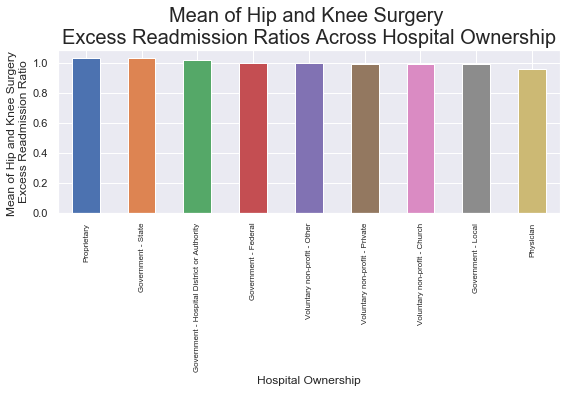

In [44]:
barchar(hipknee, "Hospital Ownership", "Hip and Knee Surgery")

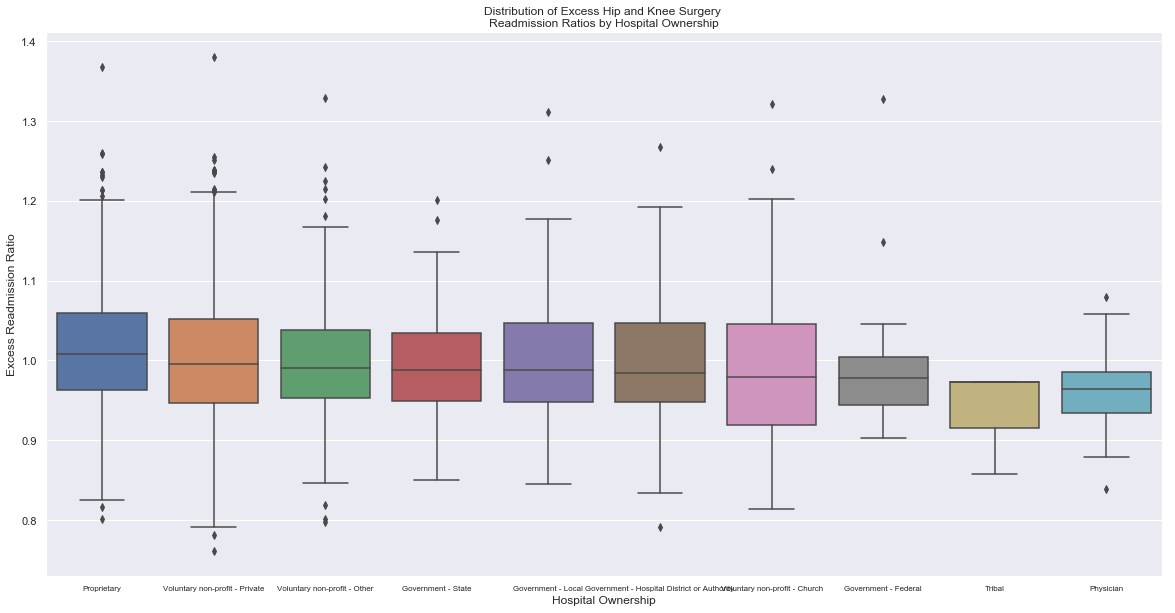

In [45]:
boxp(pn, "Hospital Ownership", "Hip and Knee Surgery")

**Breakdown of Excess Chronic Obstructive Pulmonary Disease Readmission Across Hospital Ownership**

In [46]:
mean_std(copd,"Hospital Ownership")

Excess Readmission Ratio          
                                                                mean       std
Hospital Ownership                                                            
Proprietary                                                 1.011932  0.063368
Government - Federal                                        1.011857  0.043691
Voluntary non-profit - Private                              1.000916  0.062065
Government - Local                                          1.000778  0.054151
Voluntary non-profit - Church                               0.996898  0.062816
Voluntary non-profit - Other                                0.996095  0.063051
Physician                                                   0.993521  0.061673
Government - State                                          0.993236  0.049408
Government - Hospital District or Authority                 0.992679  0.051340
Tribal                                                      0.978900  0.012610

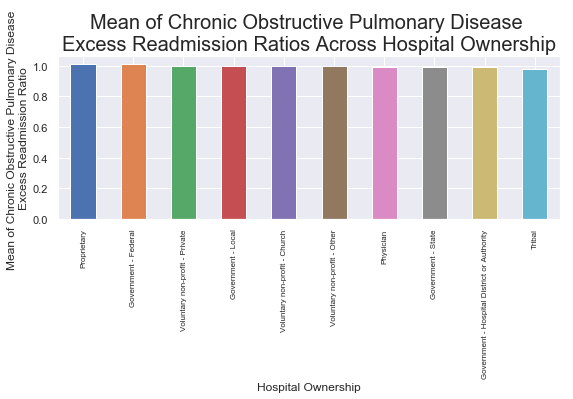

In [47]:
barchar(copd, "Hospital Ownership", "Chronic Obstructive Pulmonary Disease")

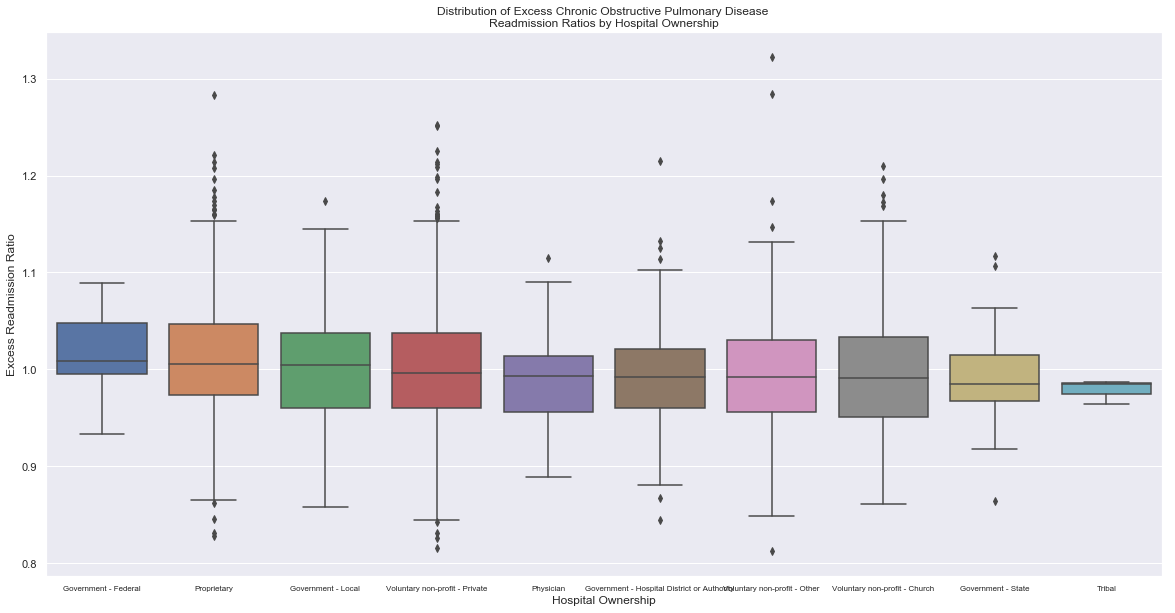

In [48]:
boxp(copd, "Hospital Ownership", "Chronic Obstructive Pulmonary Disease")

**Breakdown of Excess Coronary Artery Bypass Graft Readmission Ratio across Hospital Type**

In [49]:
mean_std(cabg,"Hospital Ownership")

Excess Readmission Ratio          
                                                                mean       std
Hospital Ownership                                                            
Government - Federal                                        1.131000  0.060528
Proprietary                                                 1.045564  0.109944
Voluntary non-profit - Church                               0.999095  0.098640
Government - Hospital District or Authority                 0.993564  0.103672
Government - Local                                          0.991283  0.094324
Voluntary non-profit - Private                              0.991182  0.106561
Voluntary non-profit - Other                                0.990613  0.091608
Government - State                                          0.966461  0.137930
Physician                                                   0.953086  0.116083

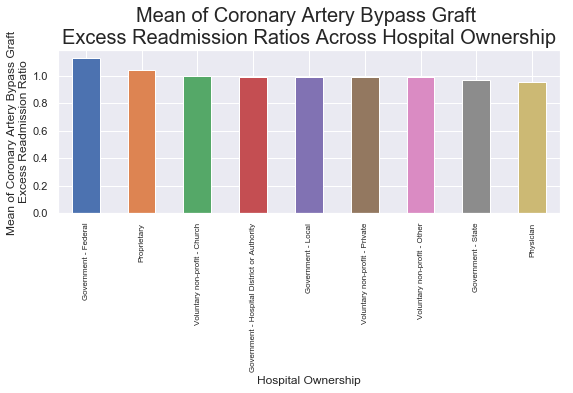

In [50]:
barchar(cabg, "Hospital Ownership", "Coronary Artery Bypass Graft")

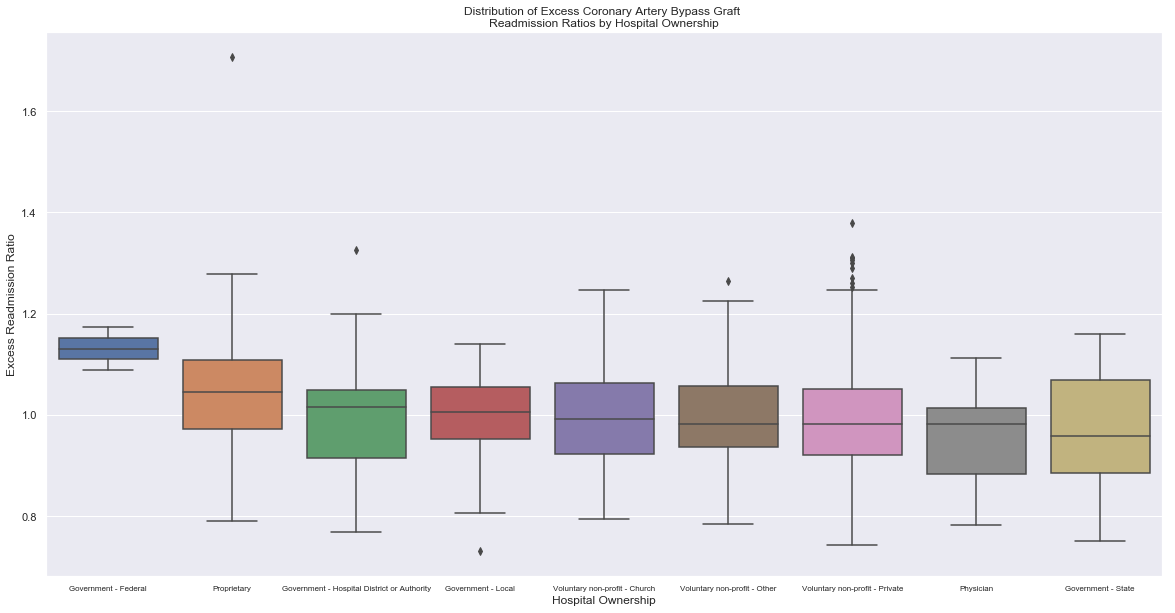

In [51]:
boxp(cabg, "Hospital Ownership", "Coronary Artery Bypass Graft")

**Breakdown of Excess Heart Failure Readmission Across Hospital Ownership**

In [52]:
mean_std(hf,"Hospital Ownership")

Excess Readmission Ratio          
                                                                mean       std
Hospital Ownership                                                            
Government - State                                          1.024069  0.055820
Proprietary                                                 1.023343  0.073194
Government - Federal                                        1.019457  0.061295
Government - Local                                          1.003815  0.073542
Government - Hospital District or Authority                 1.003607  0.064230
Tribal                                                      0.998667  0.009452
Voluntary non-profit - Private                              0.996949  0.076667
Voluntary non-profit - Other                                0.989055  0.070722
Voluntary non-profit - Church                               0.984991  0.076807
Physician                                                   0.962312  0.071210

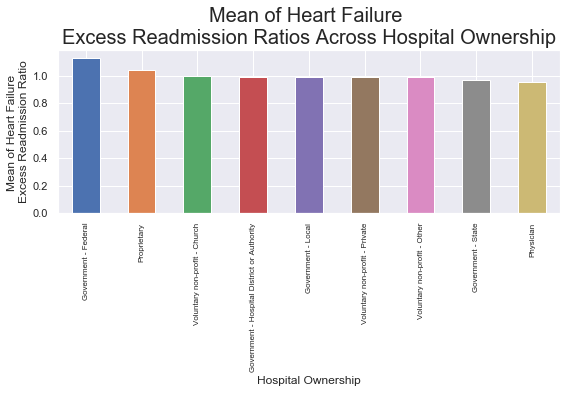

In [53]:
barchar(cabg, "Hospital Ownership", "Heart Failure")

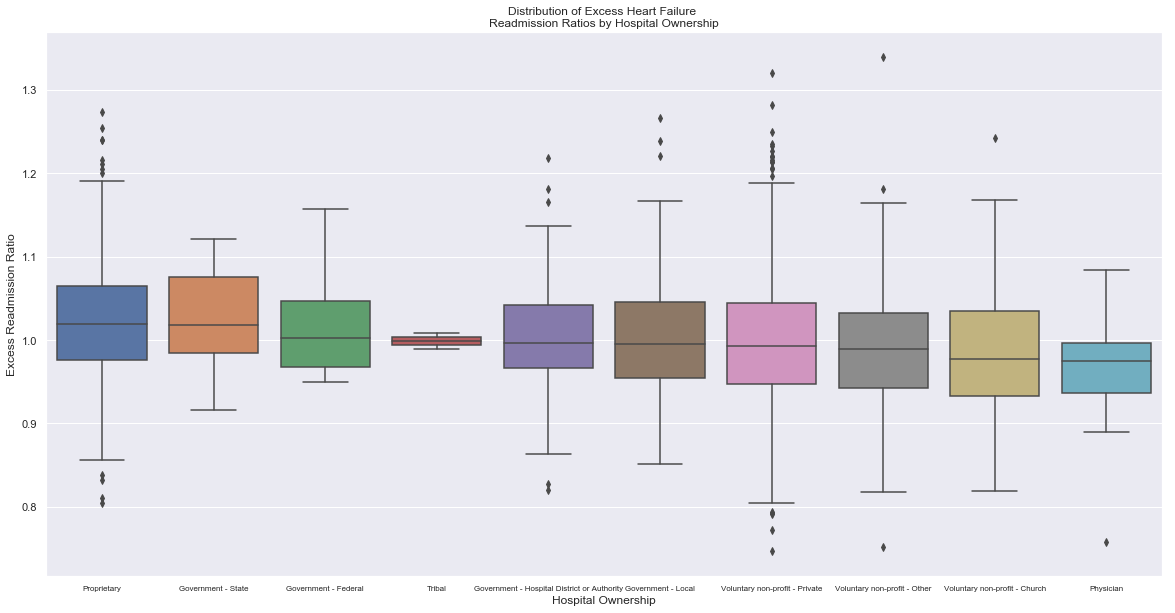

In [54]:
boxp(hf, "Hospital Ownership", "Heart Failure")

**Breakdown of Excess Acute Myocardial Infarction Readmission Across Hospital Overall Rating**

In [55]:
mean_std(ami,"Hospital overall rating")

Excess Readmission Ratio          
                                            mean       std
Hospital overall rating                                   
1                                       1.027707  0.066050
2                                       1.017726  0.063427
3                                       1.002070  0.057338
4                                       0.985004  0.057446
5                                       0.964916  0.066483
Not Available                           0.936700  0.022486

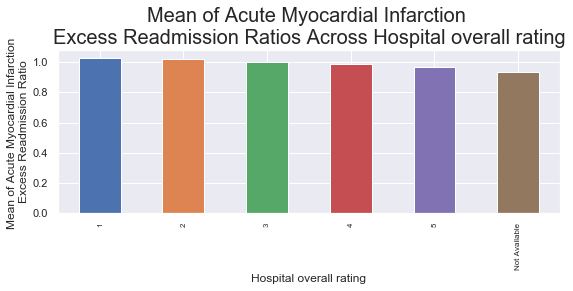

In [56]:
barchar(ami, "Hospital overall rating", "Acute Myocardial Infarction")

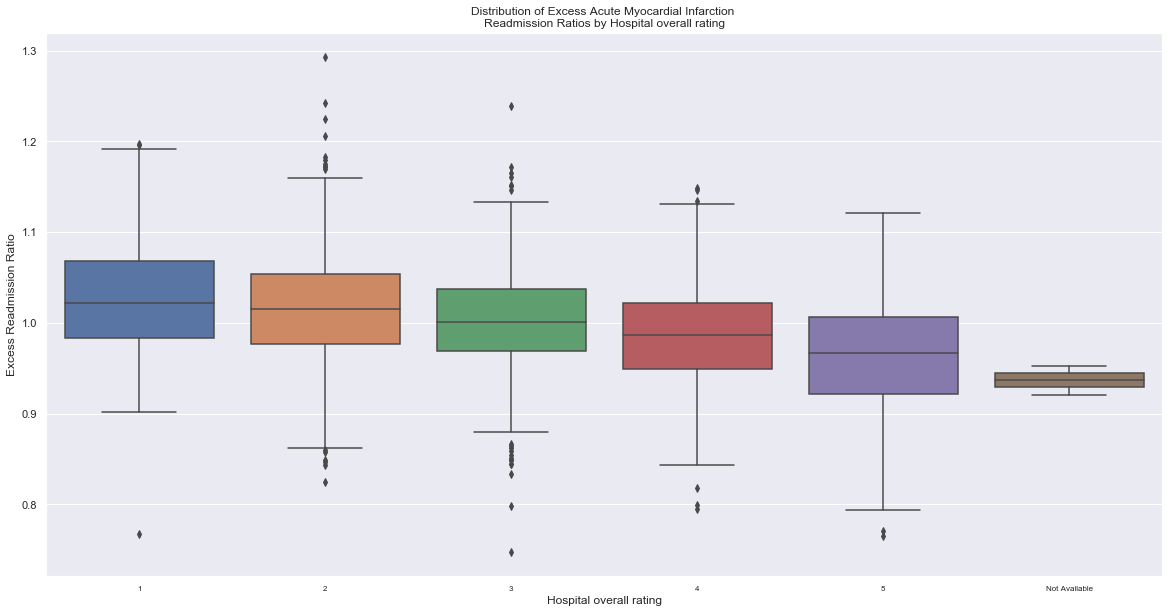

In [57]:
boxp(ami, "Hospital overall rating", "Acute Myocardial Infarction")

**Breakdown of Excess Pneumonia Readmission Across Hospital Overall Rating**

In [58]:
mean_std(pn,"Hospital overall rating")

Excess Readmission Ratio          
                                            mean       std
Hospital overall rating                                   
1                                       1.066141  0.086769
2                                       1.029695  0.076930
3                                       0.997123  0.074432
Not Available                           0.993005  0.035846
4                                       0.972724  0.067343
5                                       0.952288  0.067833

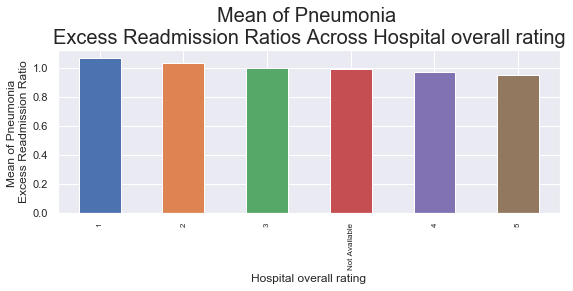

In [59]:
barchar(pn, "Hospital overall rating", "Pneumonia")

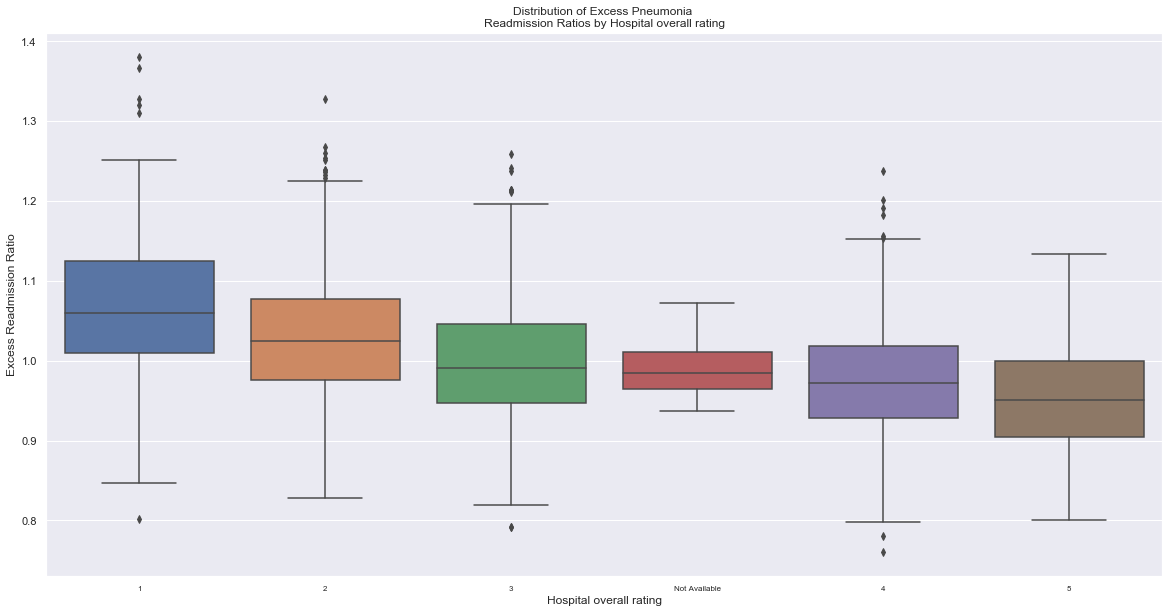

In [60]:
boxp(pn, "Hospital overall rating", "Pneumonia")

**Breakdown of Excess Hip and Knee Surgery Readmission Across Hospital Overall Rating**

In [61]:
mean_std(hipknee,"Hospital overall rating")

Excess Readmission Ratio          
                                            mean       std
Hospital overall rating                                   
1                                       1.052046  0.136052
2                                       1.033299  0.128693
3                                       1.014817  0.126804
4                                       0.986296  0.114341
Not Available                           0.967532  0.128861
5                                       0.936144  0.135817

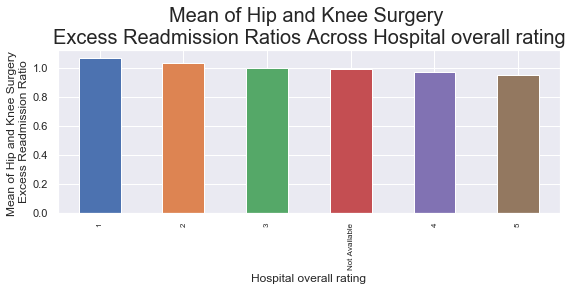

In [62]:
barchar(pn, "Hospital overall rating", "Hip and Knee Surgery")

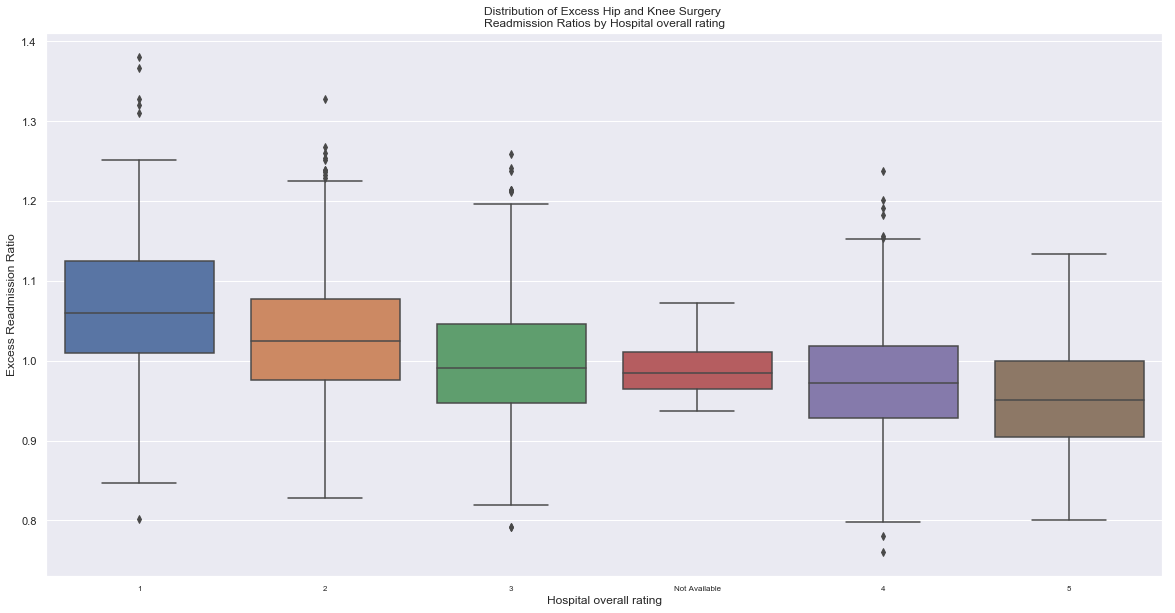

In [63]:
boxp(pn, "Hospital overall rating", "Hip and Knee Surgery")

**Breakdown of Excess Hip and Knee Surgery Readmission Across Hospital Overall Rating**

In [64]:
mean_std(copd,"Hospital overall rating")

Excess Readmission Ratio          
                                            mean       std
Hospital overall rating                                   
1                                       1.037967  0.065890
2                                       1.017954  0.062294
3                                       0.998363  0.056383
4                                       0.986142  0.053617
Not Available                           0.981518  0.052158
5                                       0.965759  0.057755

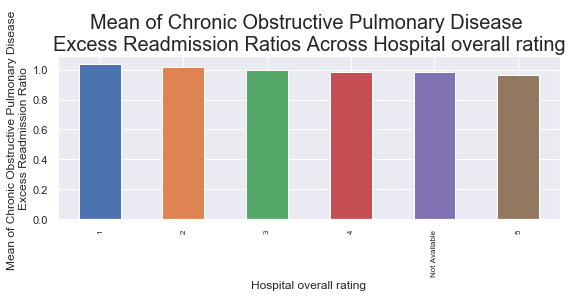

In [65]:
barchar(copd, "Hospital overall rating", "Chronic Obstructive Pulmonary Disease")

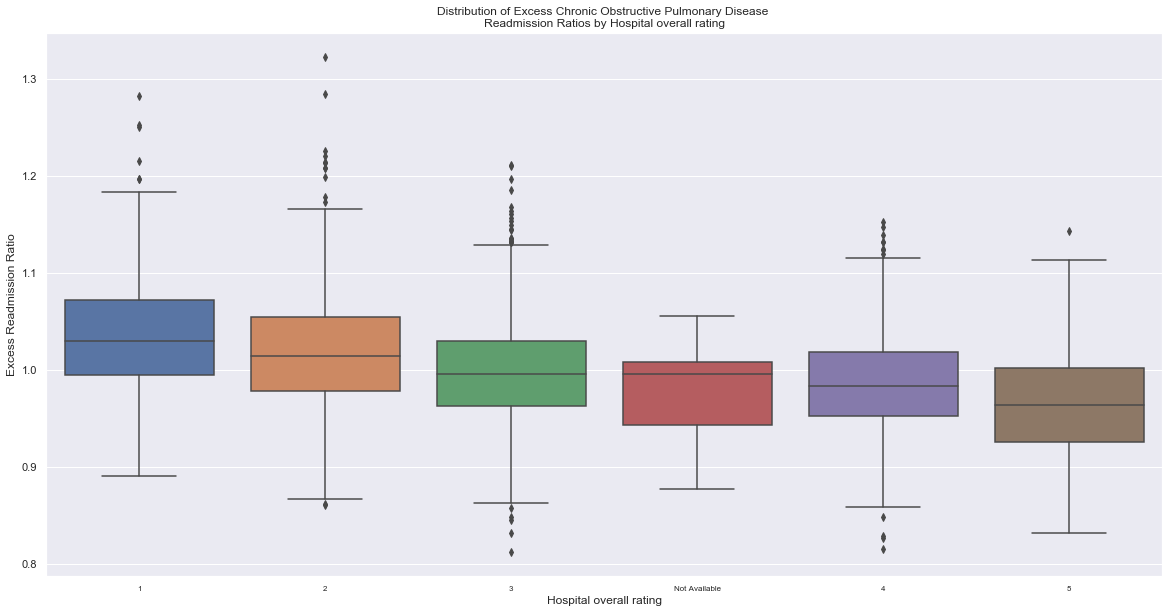

In [66]:
boxp(copd, "Hospital overall rating", "Chronic Obstructive Pulmonary Disease")

**Breakdown of Excess Coronary Artery Bypass Graft Readmission Across Hospital Overall Rating**

In [67]:
mean_std(cabg,"Hospital overall rating")

Excess Readmission Ratio          
                                            mean       std
Hospital overall rating                                   
1                                       1.027756  0.113246
2                                       1.022603  0.109910
3                                       1.001688  0.103556
4                                       0.987633  0.100860
5                                       0.955715  0.098135

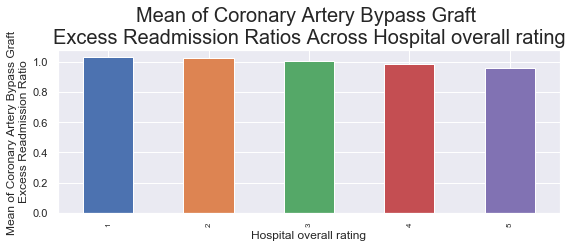

In [68]:
barchar(cabg, "Hospital overall rating", "Coronary Artery Bypass Graft")

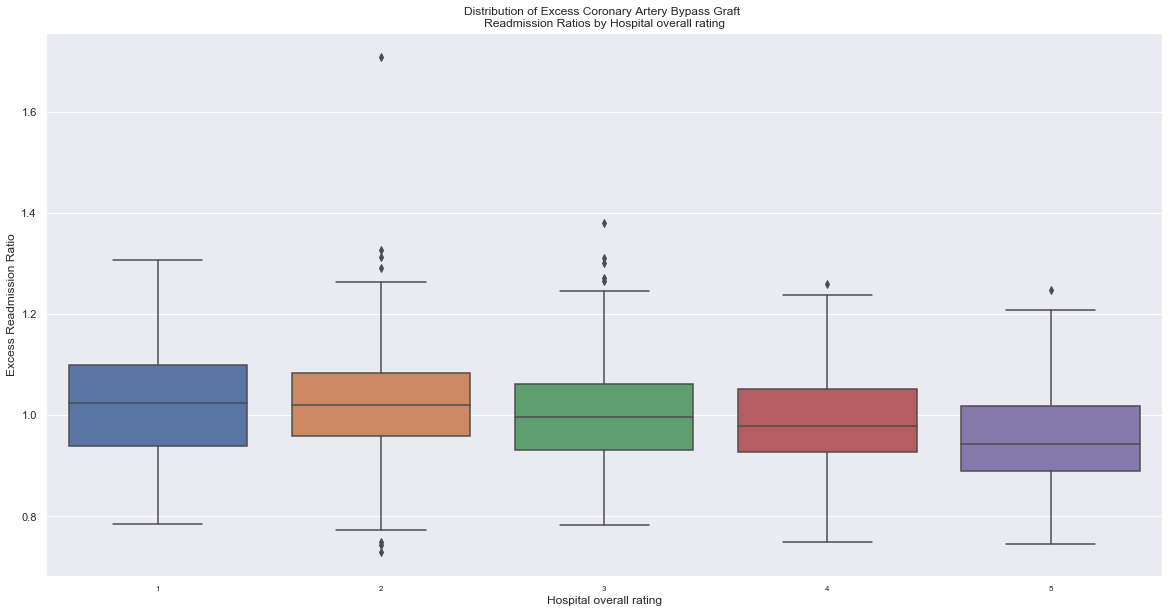

In [69]:
boxp(cabg, "Hospital overall rating", "Coronary Artery Bypass Graft")

**Breakdown of Excess Heart Failure Readmission Across Hospital Overall Rating**

In [70]:
mean_std(hf,"Hospital overall rating")

Excess Readmission Ratio          
                                            mean       std
Hospital overall rating                                   
1                                       1.057430  0.079051
2                                       1.029415  0.071071
3                                       0.998509  0.065661
Not Available                           0.989386  0.049093
4                                       0.974240  0.065301
5                                       0.943067  0.066515

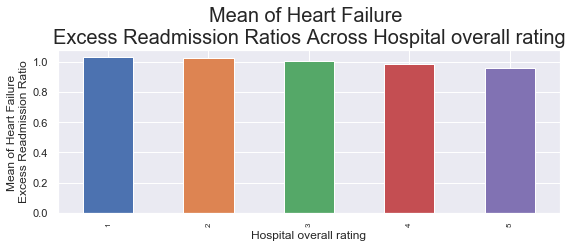

In [71]:
barchar(cabg, "Hospital overall rating", "Heart Failure")

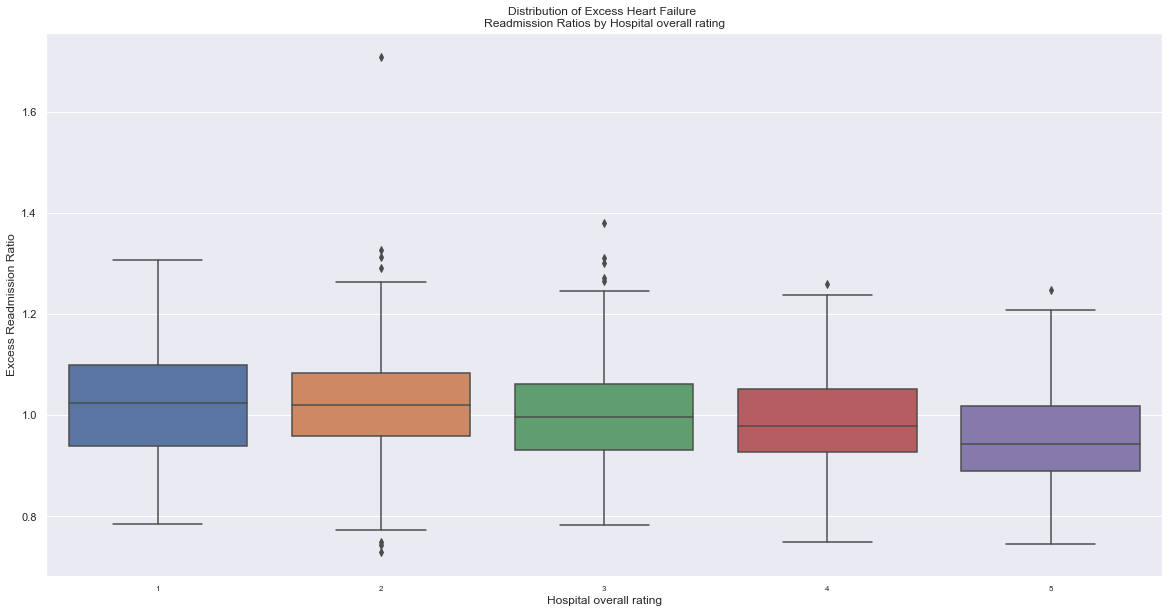

In [72]:
boxp(cabg, "Hospital overall rating", "Heart Failure")

**Breakdown of Excess Acute Myocardial Infarction Readmission Across States**

In [73]:
mean_std(ami,"State")

Excess Readmission Ratio          
                          mean       std
State                                   
NJ                    1.032903  0.068106
MA                    1.031578  0.063386
WV                    1.029223  0.027617
FL                    1.029072  0.066484
MS                    1.021609  0.053690
KY                    1.021514  0.052978
RI                    1.020511  0.050118
AL                    1.016911  0.049692
NY                    1.016269  0.059293
AR                    1.015921  0.079907
MI                    1.011241  0.073376
TX                    1.009156  0.055896
GA                    1.009072  0.062583
LA                    1.008886  0.076809
PA                    1.008052  0.057214
SC                    1.008045  0.059383
CA                    1.007127  0.060853
IL                    1.006168  0.056979
DC                    1.005871  0.022148
NV                    1.004818  0.079680
DE                    1.004333  0.071777
CT                    1.004021  0.063480
OH                    1.003473  0.054707
TN                    1.003141  0.056690
MO                    0.999522  0.065100
MD                    0.998592  0.059802
WY                    0.996675  0.048878
VA                    0.994652  0.053477
OK                    0.994125  0.063919
NM                    0.992060  0.066963
VT                    0.987380  0.047615
IN                    0.986078  0.055038
WA                    0.981536  0.062862
NC                    0.981250  0.065655
KS                    0.975905  0.074530
NH                    0.975608  0.085552
AZ                    0.974198  0.054816
CO                    0.968769  0.045006
WI                    0.967562  0.058201
MN                    0.966032  0.055928
HI                    0.964375  0.030788
ME                    0.961267  0.059189
IA                    0.959117  0.061331
SD                    0.957338  0.088526
OR                    0.955236  0.056382
NE                    0.951256  0.067379
ND                    0.951250  0.044122
UT                    0.945293  0.057269
MT                    0.942456  0.053783
AK                    0.938540  0.055285
ID                    0.912189  0.060084

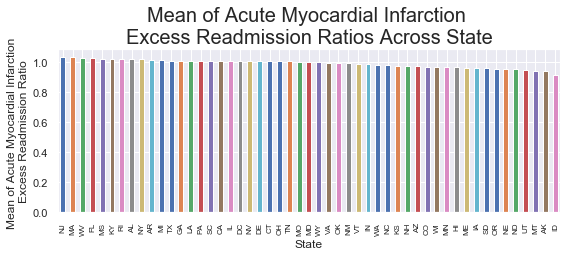

In [74]:
barchar(ami, "State", "Acute Myocardial Infarction")

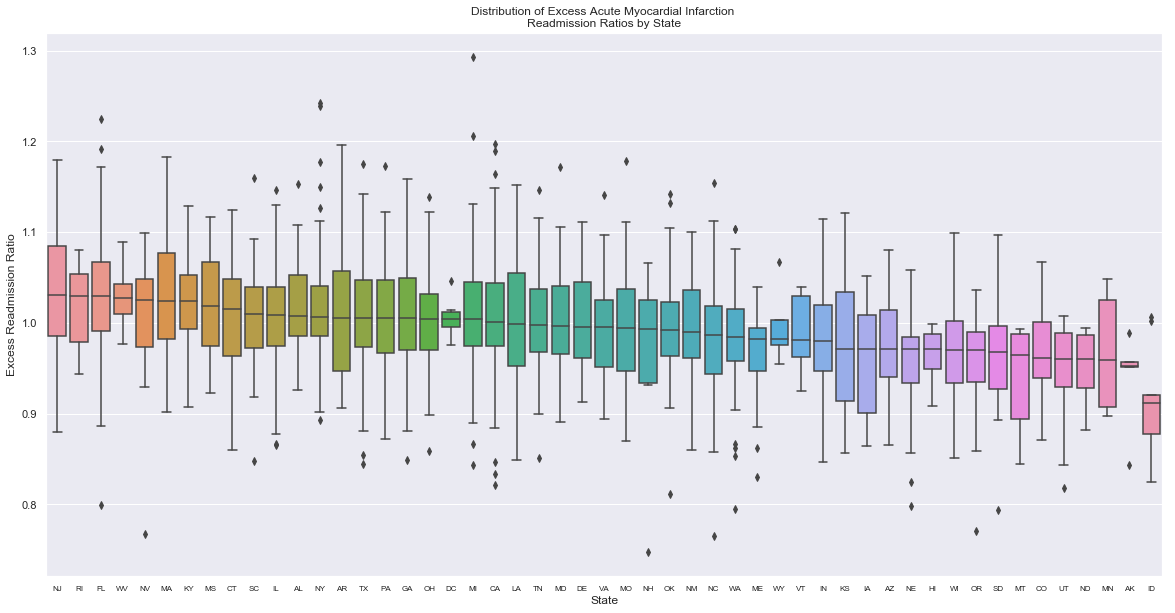

In [75]:
boxp(ami, "State", "Acute Myocardial Infarction")

**Breakdown of Excess Pneumonia Readmission Across States**

In [76]:
mean_std(pn,"State")

Excess Readmission Ratio          
                          mean       std
State                                   
DC                    1.070971  0.038040
NY                    1.066302  0.085439
NJ                    1.059327  0.076746
NV                    1.053280  0.076587
MS                    1.036105  0.081264
CT                    1.033497  0.077287
MA                    1.029185  0.082197
FL                    1.024978  0.087075
TN                    1.022301  0.067550
IL                    1.020912  0.082563
AR                    1.017193  0.084332
KY                    1.016697  0.086354
MO                    1.015806  0.075863
GA                    1.013138  0.071816
VA                    1.012900  0.068930
MD                    1.010704  0.081601
CA                    1.010445  0.084718
AL                    1.006291  0.061724
WV                    1.005404  0.067565
SC                    1.003908  0.060854
NH                    1.002131  0.083216
NC                    1.000779  0.081117
OH                    1.000503  0.074764
MI                    0.997559  0.087253
LA                    0.993729  0.066294
PA                    0.993441  0.077397
NE                    0.990067  0.048791
OK                    0.987754  0.071882
NM                    0.985278  0.061036
MN                    0.980553  0.065118
DE                    0.979817  0.088360
TX                    0.979136  0.063340
KS                    0.976663  0.073324
ND                    0.973214  0.073859
AZ                    0.972757  0.066203
OR                    0.971897  0.058944
WI                    0.965848  0.055679
HI                    0.965292  0.054329
IN                    0.962716  0.080570
RI                    0.959644  0.059757
IA                    0.958118  0.067585
WA                    0.955630  0.068281
ME                    0.946200  0.068950
WY                    0.945189  0.055498
CO                    0.941955  0.051586
MT                    0.939008  0.059523
VT                    0.936850  0.077517
AK                    0.927412  0.047102
UT                    0.919036  0.055311
SD                    0.911200  0.043388
ID                    0.909690  0.044536

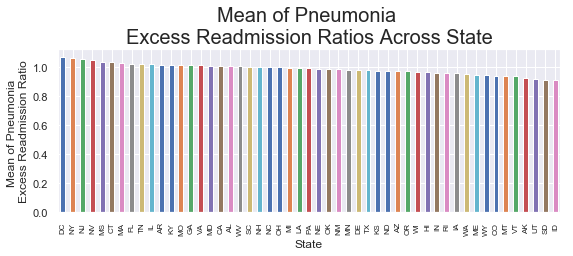

In [77]:
barchar(pn, "State", "Pneumonia")

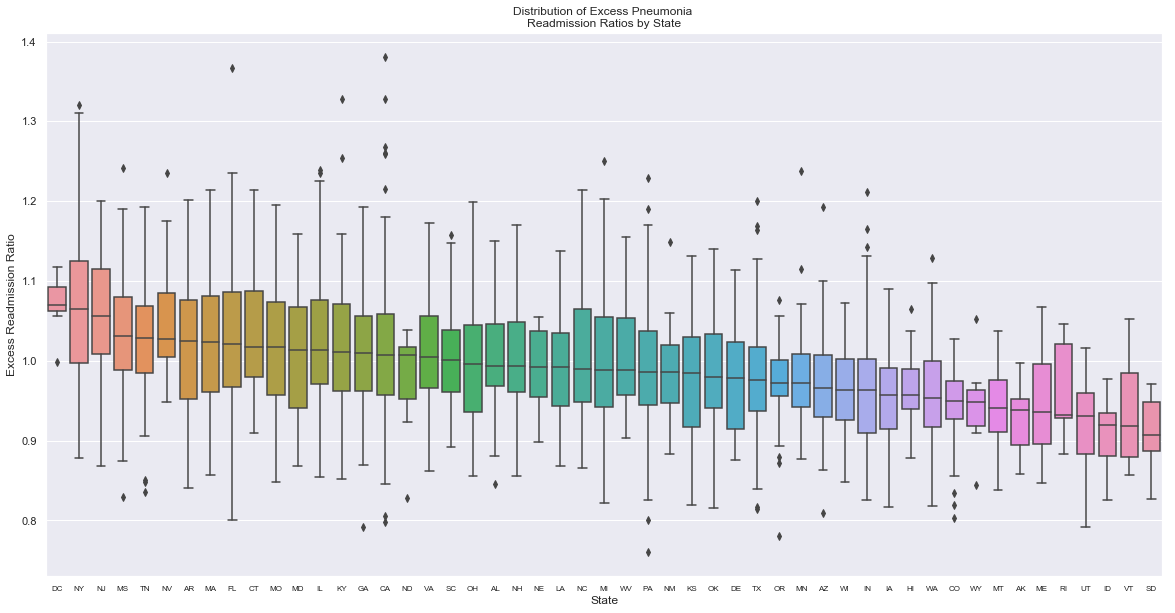

In [78]:
boxp(pn, "State", "Pneumonia")

**Breakdown of Excess Hip and Knee Surgery Readmission Across States**

In [79]:
mean_std(hipknee,"State")

Excess Readmission Ratio          
                          mean       std
State                                   
AL                    1.080635  0.154243
WY                    1.074633  0.129543
GA                    1.049320  0.149560
MA                    1.044571  0.159949
LA                    1.044300  0.145710
TN                    1.042800  0.122958
NJ                    1.034298  0.122485
MS                    1.031688  0.114789
TX                    1.026774  0.109599
PA                    1.024648  0.130232
KY                    1.023367  0.091253
OK                    1.023331  0.116042
WV                    1.022600  0.127027
FL                    1.022302  0.150745
VA                    1.022090  0.137152
NV                    1.020532  0.093085
NM                    1.017181  0.133607
AR                    1.016479  0.114719
IL                    1.015698  0.118694
SC                    1.013290  0.164361
AZ                    1.010159  0.137384
MI                    1.008871  0.119520
MO                    1.007607  0.137089
NC                    1.005830  0.118417
DC                    1.003880  0.136576
MD                    1.003407  0.130810
KS                    0.996636  0.182378
MN                    0.996487  0.102175
IN                    0.992405  0.117377
NY                    0.991029  0.131327
CA                    0.989444  0.136775
NH                    0.984962  0.102531
RI                    0.983925  0.108634
CT                    0.983258  0.114347
OH                    0.980054  0.098929
UT                    0.975421  0.103117
WI                    0.973430  0.107449
CO                    0.971645  0.123586
IA                    0.964659  0.117053
AK                    0.964657  0.151658
ME                    0.958106  0.104607
OR                    0.955933  0.116631
ID                    0.955792  0.121504
WA                    0.938912  0.100346
NE                    0.934557  0.115315
VT                    0.932933  0.171144
HI                    0.919133  0.088269
MT                    0.916392  0.162407
SD                    0.907962  0.123304
DE                    0.897850  0.140361
ND                    0.847083  0.099121

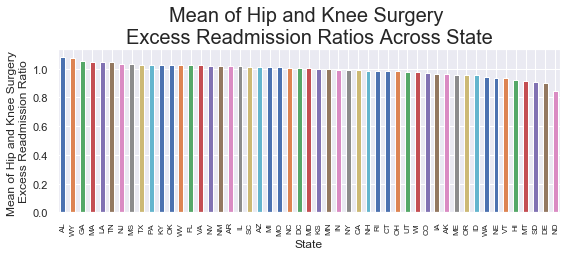

In [80]:
barchar(hipknee, "State", "Hip and Knee Surgery")

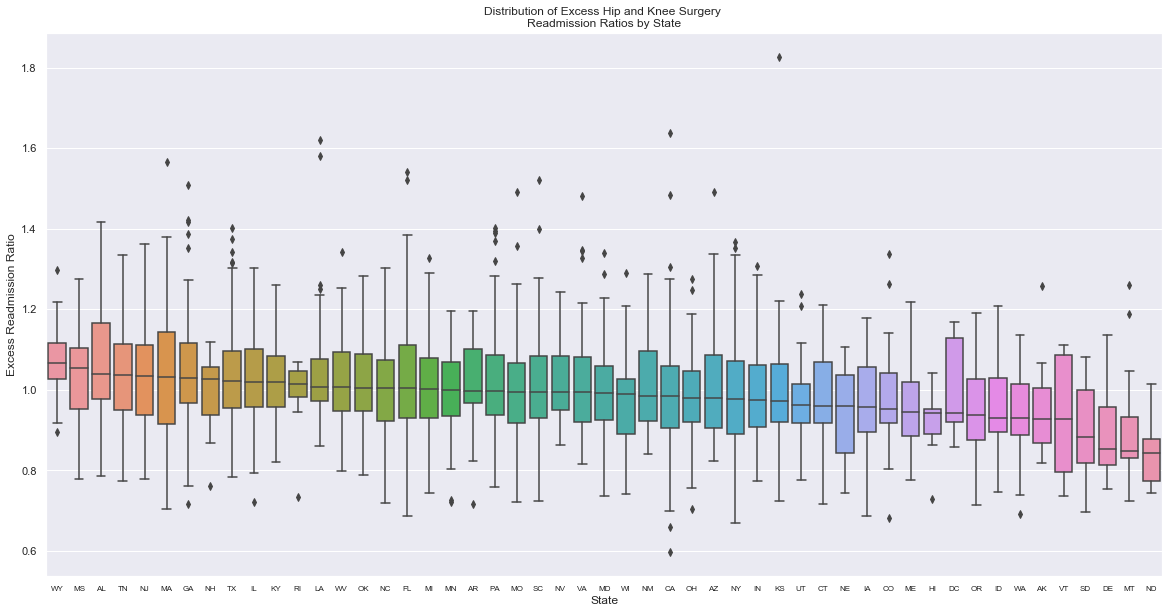

In [81]:
boxp(hipknee, "State", "Hip and Knee Surgery")

**Breakdown of Excess Chronic Obstructive Pulmonary Disease Readmission Across States**

In [82]:
mean_std(copd,"State")

Excess Readmission Ratio          
                          mean       std
State                                   
MA                    1.048002  0.083632
NJ                    1.042121  0.062384
NY                    1.038459  0.061574
NV                    1.032105  0.067883
KY                    1.029617  0.074663
RI                    1.026900  0.086341
FL                    1.025313  0.066780
DC                    1.015071  0.060007
MS                    1.013084  0.056643
WV                    1.010532  0.067782
TN                    1.010521  0.050869
CT                    1.009268  0.057361
ND                    1.009029  0.060084
AR                    1.008863  0.061148
MO                    1.007687  0.068817
PA                    1.006548  0.057809
WY                    1.004900  0.050358
IL                    1.002827  0.062934
VA                    1.002672  0.058550
MI                    1.000587  0.064381
WA                    0.998661  0.053114
NH                    0.998108  0.051376
OH                    0.998054  0.053226
OK                    0.997941  0.050834
CA                    0.997626  0.054265
NE                    0.994989  0.055430
AL                    0.994969  0.056983
MD                    0.992091  0.062452
NC                    0.992049  0.055755
MN                    0.991641  0.033142
GA                    0.991632  0.058621
SC                    0.991161  0.052561
DE                    0.990417  0.074096
LA                    0.988971  0.049731
KS                    0.988957  0.041561
NM                    0.987671  0.057310
TX                    0.987386  0.059884
OR                    0.984297  0.043583
AZ                    0.983842  0.043494
IA                    0.982555  0.061248
IN                    0.981120  0.057799
AK                    0.979525  0.044709
WI                    0.979385  0.058713
ME                    0.970294  0.045485
HI                    0.968145  0.017382
CO                    0.967032  0.055992
MT                    0.965183  0.042915
VT                    0.964433  0.080642
UT                    0.960710  0.049714
ID                    0.929800  0.041665
SD                    0.918773  0.047433

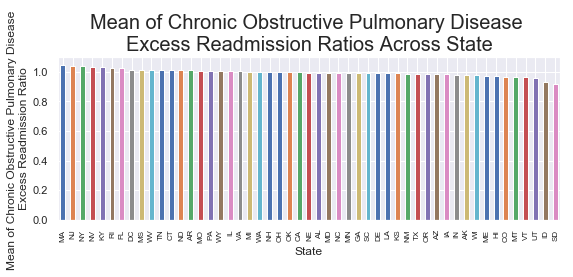

In [83]:
barchar(copd, "State", "Chronic Obstructive Pulmonary Disease")

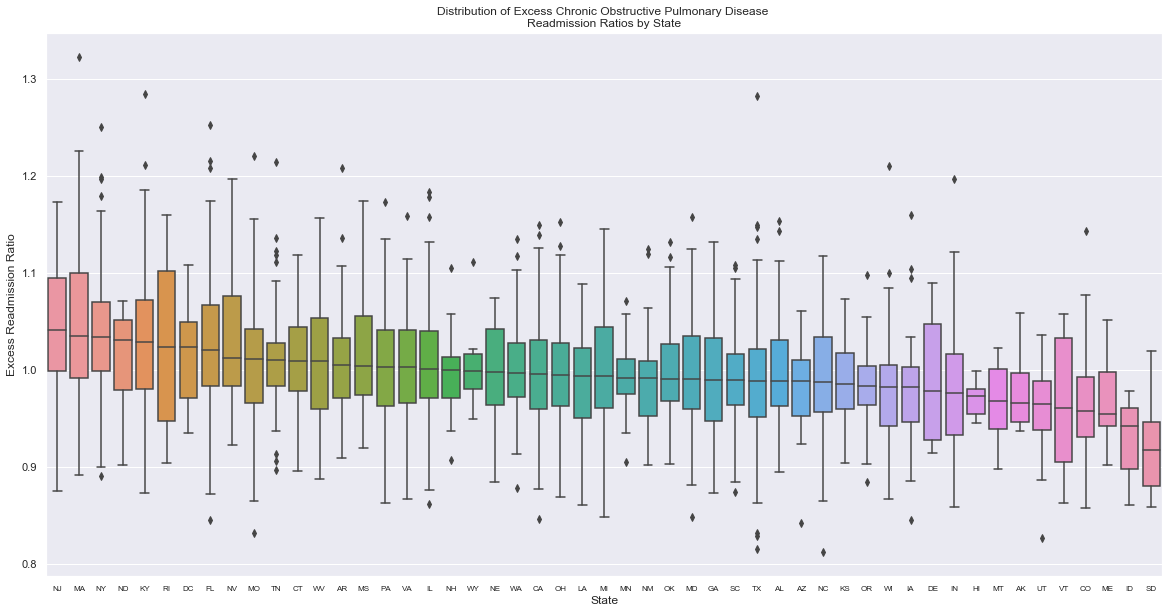

In [84]:
boxp(copd, "State", "Chronic Obstructive Pulmonary Disease")

**Breakdown of Excess Coronary Artery Bypass Graft Readmission Across States**

In [85]:
mean_std(copd,"State")

Excess Readmission Ratio          
                          mean       std
State                                   
MA                    1.048002  0.083632
NJ                    1.042121  0.062384
NY                    1.038459  0.061574
NV                    1.032105  0.067883
KY                    1.029617  0.074663
RI                    1.026900  0.086341
FL                    1.025313  0.066780
DC                    1.015071  0.060007
MS                    1.013084  0.056643
WV                    1.010532  0.067782
TN                    1.010521  0.050869
CT                    1.009268  0.057361
ND                    1.009029  0.060084
AR                    1.008863  0.061148
MO                    1.007687  0.068817
PA                    1.006548  0.057809
WY                    1.004900  0.050358
IL                    1.002827  0.062934
VA                    1.002672  0.058550
MI                    1.000587  0.064381
WA                    0.998661  0.053114
NH                    0.998108  0.051376
OH                    0.998054  0.053226
OK                    0.997941  0.050834
CA                    0.997626  0.054265
NE                    0.994989  0.055430
AL                    0.994969  0.056983
MD                    0.992091  0.062452
NC                    0.992049  0.055755
MN                    0.991641  0.033142
GA                    0.991632  0.058621
SC                    0.991161  0.052561
DE                    0.990417  0.074096
LA                    0.988971  0.049731
KS                    0.988957  0.041561
NM                    0.987671  0.057310
TX                    0.987386  0.059884
OR                    0.984297  0.043583
AZ                    0.983842  0.043494
IA                    0.982555  0.061248
IN                    0.981120  0.057799
AK                    0.979525  0.044709
WI                    0.979385  0.058713
ME                    0.970294  0.045485
HI                    0.968145  0.017382
CO                    0.967032  0.055992
MT                    0.965183  0.042915
VT                    0.964433  0.080642
UT                    0.960710  0.049714
ID                    0.929800  0.041665
SD                    0.918773  0.047433

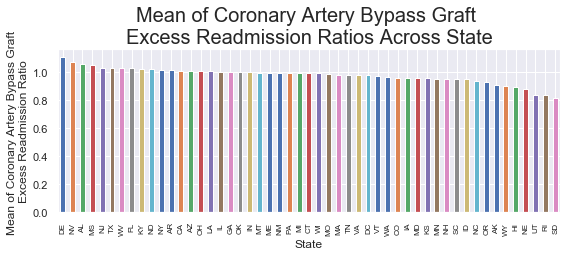

In [86]:
barchar(cabg, "State", "Coronary Artery Bypass Graft")

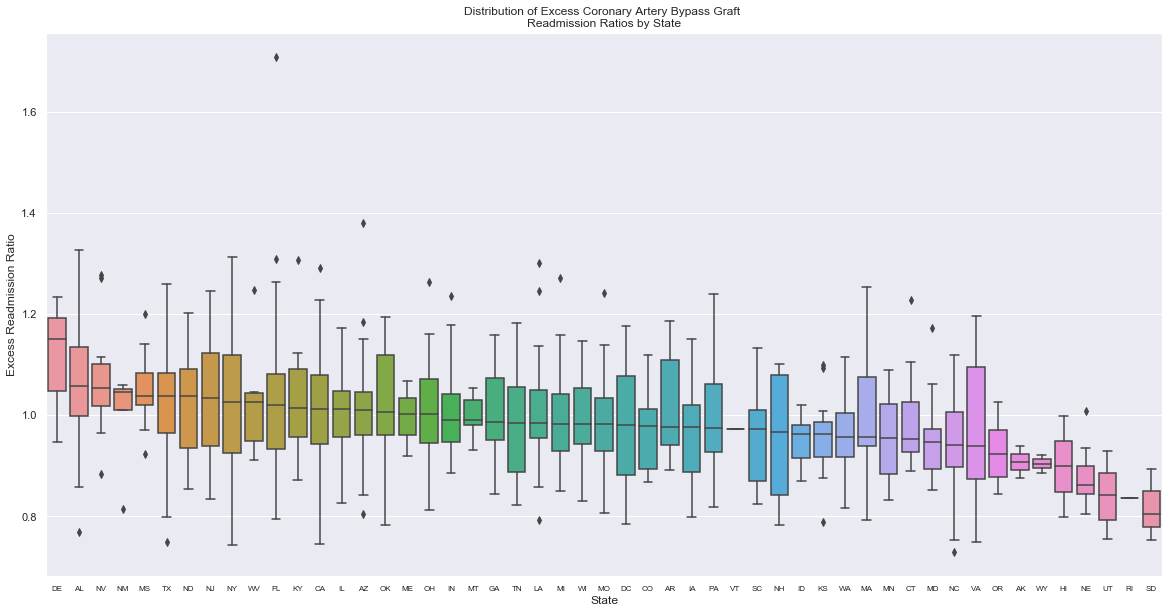

In [87]:
boxp(cabg, "State", "Coronary Artery Bypass Graft")

**Breakdown of Excess Heart Failure Readmission Across States**

In [88]:
mean_std(hf,"State")

Excess Readmission Ratio          
                          mean       std
State                                   
DC                    1.062643  0.088743
NY                    1.055304  0.083942
AR                    1.054837  0.068740
MA                    1.045896  0.078350
FL                    1.036910  0.078729
KY                    1.028658  0.077838
MS                    1.023485  0.054569
WV                    1.023269  0.062270
NV                    1.022105  0.066270
LA                    1.017599  0.058448
TN                    1.015720  0.052304
RI                    1.013067  0.069804
NJ                    1.012406  0.083890
IL                    1.009806  0.071594
CA                    1.008035  0.069605
AL                    1.007064  0.058024
SC                    1.003248  0.083488
MI                    1.002865  0.078899
VA                    1.000038  0.077659
DE                    0.998900  0.066693
OK                    0.998602  0.070124
GA                    0.998170  0.060779
NC                    0.997618  0.081716
CT                    0.996361  0.085634
TX                    0.995967  0.065968
OH                    0.994832  0.068819
PA                    0.994280  0.071214
MD                    0.994160  0.071927
MO                    0.991551  0.065544
HI                    0.982225  0.037324
NH                    0.979685  0.081247
MN                    0.979454  0.046198
KS                    0.977831  0.066834
IN                    0.977599  0.073900
AK                    0.976763  0.091530
WA                    0.974148  0.068208
NM                    0.970454  0.059548
WY                    0.968150  0.042970
VT                    0.966367  0.069889
IA                    0.965545  0.067561
AZ                    0.963752  0.065740
OR                    0.958823  0.053519
ME                    0.952188  0.078441
WI                    0.947582  0.053032
SD                    0.941967  0.055576
UT                    0.941683  0.069364
NE                    0.937274  0.094330
CO                    0.936515  0.052933
ND                    0.931483  0.068917
MT                    0.913482  0.056084
ID                    0.906340  0.075093

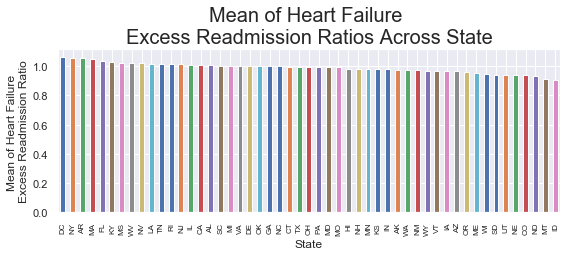

In [89]:
barchar(hf, "State", "Heart Failure")

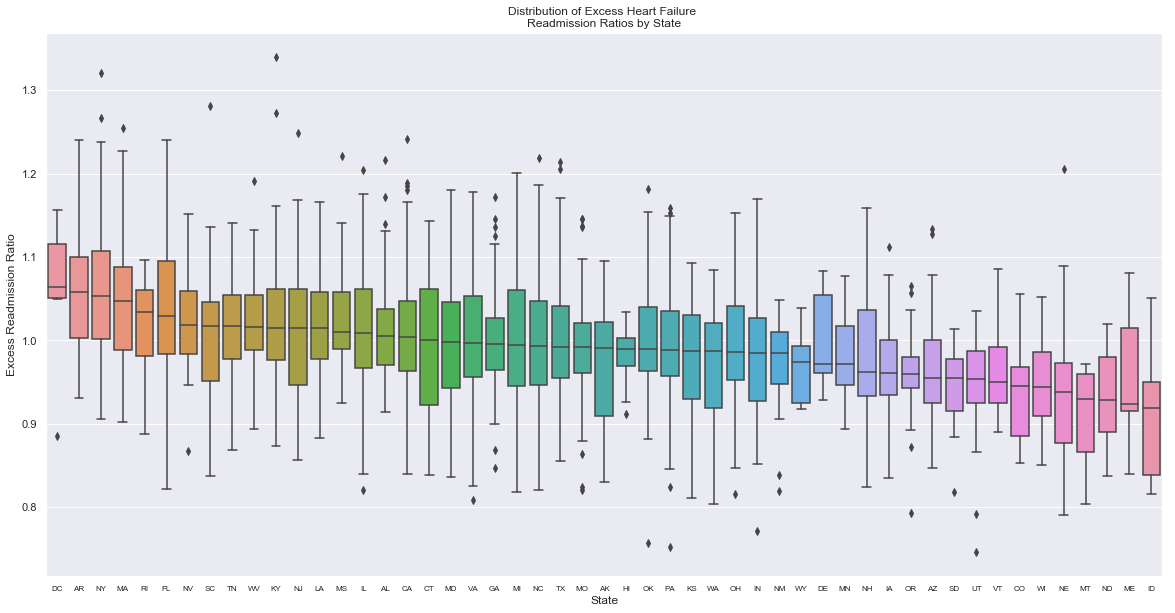

In [90]:
boxp(hf, "State", "Heart Failure")

## Summary of Findings

The vast majority of mean Excess Readmission Ratio (ERR) values are between 1.1 and 0.9, regardless of the hospital category assessed (i.e. Hospital Ownership, Hospital Overall Quality, Hospital State).

Notable outliers included federal government hospitals with Coronary Artery Bypass Graft readmission ratio of 1.131, and North Dakota with a Hip and Knee Surgery readmission ratio of 0.847


**Distribution by Hospital Ownership:**

Although there was no universal pattern, proprietary owned hospitals were typically among the hospitals with the highest ERR values across hospital type. Federal, state, and local government also tended to have higher ERR values, at or above 1.0, although this was not universally true across ERR categories.

Conversely, physician and tribal hospitals tended to have average ERR values below other types of hospital ownership, typically below a 1.0 value. 

Various types of voluntary hospitals tended to demonstrate ERR values towards the center, hovering a little above or below a 1.0 value.

While there was no uniform pattern of ERR variability, proprietary and various sub-groups of voluntary hospitals often tended to demonstrate a relatively higher degree of variability across their ERR values, while federal, tribal, and physician hospitals typically demonstrated a lower degree of ERR variability. This may have been related to the fact that there was a smaller number of tribal and physician hospitals relative to other hospital types.

Across readmission types, a greater degree of variability tended to be seen by within Hip and Knee Surgery ERR values, with standard deviation values often reaching above 0.10.



ANOVA tests were conducted to see if there was statistically significant variation in the ERR for different types of Hospital Ownership, and across all 6 Readmission Measure categories:

In [91]:
print ("ANOVA results for results based on Hospital Ownership:")
for data,name in zip(measure_dfs, measure_names):
    print ("results for " + name + ":", anov(data,"Hospital Ownership"))

ANOVA results for results based on Hospital Ownership:
results for Acute Myocardial Infarction: F_onewayResult(statistic=7.502905081590765, pvalue=6.515920284456508e-10)
results for Pneumonia: F_onewayResult(statistic=3.175205923546934, pvalue=0.0007949505139613311)
results for Hip and Knee Surgery: F_onewayResult(statistic=5.2992071974609, pvalue=1.305027053913964e-06)
results for Chronic Obstructive Pulmonary Disease: F_onewayResult(statistic=2.9667830632990744, pvalue=0.0016224894448227424)
results for Coronary Artery Bypass Graft: F_onewayResult(statistic=5.7766402123029525, pvalue=3.211320628229951e-07)
results for Heart Failure: F_onewayResult(statistic=9.25767912645152, pvalue=5.811906903882055e-14)


As all p-values are below the significance threshold of 0.05 across all 6 measure types, it would appear that for each different readmission type, there is at least one Hospital Ownership category that displays statistically significantly different results from the others. The exact source of this variation is worth further investigation.

**Distribution by Overall Hospital Quality:**

It is not particularly surprising that across all 6 Excess Readmission Ratio (ERR) conditions measured, those with a higher hospital rating (i.e. those with a higher numeric value) also demonstrated a lower ERR value. Indeed it is likely that a hospital’s ERR value is a partial contributor to these aggregate ratings.

It was if interest that unrated hospitals often performed better than Hospitals with a lower 1, 2, or 3 rating. Indeed in the case of Acute Myocardial Infarction, unrated hospitals were the top performing category. It is possible this may indicate that unrated hospitals are higher performers on average, and decide to remain unrated by choice.

Unrated hospitals also tended to demonstrate a lower degree of ERR variability when compared to other types of hospitals. This was likely related to the fact that there was a smaller number of hospitals within this category, as compared to other the other hospital-rating categories.

Lower rated hospitals typically, although not uniformly, demonstrated a higher degree of variation in their mean ERR values. This may possibly indicate that they field patients with more variability in their health statuses. 

ANOVA tests were conducted to see if there was statistically significant variation in the ERR for different levels of Hospital Overall Rating, and across all 6 Readmission Measure categories:

In [92]:
print ("ANOVA results for results based on Hospital Overall Rating:")
for data,name in zip(measure_dfs, measure_names):
    print ("results for " + name + ":", anov(data,"Hospital overall rating"))

ANOVA results for results based on Hospital Overall Rating:
results for Acute Myocardial Infarction: F_onewayResult(statistic=37.38947953442101, pvalue=8.129595022660372e-37)
results for Pneumonia: F_onewayResult(statistic=106.31779166253413, pvalue=1.9782469865524123e-103)
results for Hip and Knee Surgery: F_onewayResult(statistic=31.258558680070408, pvalue=5.932297316836143e-31)
results for Chronic Obstructive Pulmonary Disease: F_onewayResult(statistic=60.09844441477285, pvalue=1.0776348555153702e-59)
results for Coronary Artery Bypass Graft: F_onewayResult(statistic=10.79189066304221, pvalue=1.44059277255666e-08)
results for Heart Failure: F_onewayResult(statistic=117.14715266754429, pvalue=4.922244570065402e-113)


As all p-values are below the significance threshold of 0.05 across all 6 measure types, it would appear that for each different readmission type, there is at least one Hospital Overall Rating category that displays statistically significantly different results from the others. The exact source of this variation is worth further investigation.

**Distribution by State:**

There was a great degree of variability in terms of mean ERR across different states. However certain states demonstrated either one of the 5 highest, or 5 lowest, mean ERR values across multiple different ERR condition categories 

Massachusetts, New Jersey, Washington DC, New York, Mississippi, Florida, Nevada, and Kentucky were among the states demonstrating one of the 5 highest mean ERR values across more than one ERR measure. It is possible that some combination of poor population health conditions, relatively large urban populations, and a cultural/linguistic divergence between the population and available medical staff may account for these higher rates.

Conversely, states that repeatedly ranked within the bottom 5 ERR values across different ERR measures, were typically, although not exclusively geographically located within the Northern Mid-West. North and South Dakota, Montana, Wyoming, Idaho, Utah, Alaska, and Vermont appeared on multiple bottom-5 ERR lists. It is possible that among other factors, low density rural populations, and a relatively homogenous ethnic/linguistic populace may contribute to these lower rates of excess readmissions. 

Although it is difficult to determine with certainty from the analysis provided, it would appear that states with higher ERR values often demonstrated a higher variability in their ERR values than states demonstrating lower values.

ANOVA tests were conducted to see if there was statistically significant variation in the ERR for different States, and across all 6 Readmission Measure categories:

In [93]:
print ("ANOVA results for results based on State:")
for data,name in zip(measure_dfs, measure_names):
    print ("results for " + name + ":", anov(data,"State"))

ANOVA results for results based on State:
results for Acute Myocardial Infarction: F_onewayResult(statistic=4.960170386130622, pvalue=4.4919979148845644e-26)
results for Pneumonia: F_onewayResult(statistic=9.493547206540068, pvalue=2.0774389617887647e-64)
results for Hip and Knee Surgery: F_onewayResult(statistic=2.8774297557909265, pvalue=1.260966543853153e-10)
results for Chronic Obstructive Pulmonary Disease: F_onewayResult(statistic=6.200924825474297, pvalue=9.55271522784439e-37)
results for Coronary Artery Bypass Graft: F_onewayResult(statistic=2.3462779623673753, pvalue=7.921408427977697e-07)
results for Heart Failure: F_onewayResult(statistic=8.855815935799585, pvalue=6.081654025818789e-59)


As all p-values are below the significance threshold of 0.05 across all 6 measure types, it would appear that for each different readmission type, there is at least one State that displays statistically significantly different results from the others. The exact source of this variation is worth further investigation.

**Conclusion:**

In conclusion, there seemed to be some general patterns in terms of Excess Readmission Ratios (ERR) across different Hospital Categories.

Proprietary and government owned hospitals tended to have higher mean ERR values, while physician owned and tribal hospitals tended to have lower mean ERR values.

Mean ERR values tended to correspond with Hospital Overall Quality ratings, with higher ranked hospitals demonstrating lower mean ERR values. Hospitals that were not rated tended to perform better than hospitals with a lower 1, or 2 value.

Mean ERR values varied widely across states, although certain states repeatedly found themselves among states with the top 5 highest mean ERR values, or with the bottom 5 lowest ERR values, across multiple ERR condition categories.

There appeared to be substantial variation in ERR for at least one Hospital category, across all different Hospital category/Readmission category combinations.